# Team Anomaly Detection Project

## About Project: 

### Description: 

In this project a teammate and I will be answering questions presented in an email from our boss concerning codeup curriculum traffic. 

### Project Goal: 

The goal of this project is to answer the questions in the email and return a email with the answers, the requested slide, and the link to this github repo. 

### Email from Boss: 

Hello,


I have some questions for you that I need to be answered before the Board meeting on Monday evening. I need to be able to speak to the following questions. I also need a single slide that I can incorporate into my existing presentation (Google Slides) that summarizes the most important points. My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well.


1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed?
8. Anything else I should be aware of?


Thank you,

### Additional Info: 

Data was acquired from Codeup's SQL database and additional contextual info was gathered from alumni.codeup.com. 

The Board meeting on Monday evening that the slide will be presented in is to discuss the general state of things and update the stakeholders (What’s the direction we are going in, and is it a good one?).

## Let's Get Started,... 

## Imports. 

These are the following imports needed to run this notebook:

In [1]:
# imports
import numpy as np
import pandas as pd

# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns

# DBSCAN import
from sklearn.cluster import DBSCAN

# Scaler import
from sklearn.preprocessing import MinMaxScaler

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Remove Limits On Viewing Dataframes
pd.set_option('display.max_columns', None)

# My Files
import env
from wrangle import *

## Acquire & Prepare. 

I acquired and prepared the data using a function stored in wrangle.py that reads data from a csv and prepares it by: 
    
    concats date + time 
    changes date_time to pd datetime
    changes date to pd datetime
    changes time to pd datetime
    sets index to date_time
    changes cohort start to datetime
    changes cohort end to datetime
    label students by the program they are in
    create column where true or false if staff
    create column with date - end date
    drop columns
    returns df

In [2]:
df = get_n_prep_curr_logs()

In [3]:
df.head()

,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,date_time,program,staff,days_after_grad
date_time,,,,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,2018-01-26 09:55:03,php,False,720 days
2018-01-26 09:56:02,java-ii,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,2018-01-26 09:56:02,php,False,720 days
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,2018-01-26 09:56:05,php,False,720 days
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,2018-01-26 09:56:06,php,False,720 days
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,2,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2018-01-26 09:56:24,java,False,-111 days


In [4]:
# confirm there are no nulls
# df.isna().sum()

### 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

It would be suspicious if 

### 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [5]:
# column with year 
df['year'] = df.index.year
df.head(1)

,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,date_time,program,staff,days_after_grad,year
date_time,,,,,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,2018-01-26 09:55:03,php,False,720 days,2018


In [6]:
# df where year in index is 2019
df_2019 = df[df.index.year == 2019]
df_2019.head()

,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,date_time,program,staff,days_after_grad,year
date_time,,,,,,,,,,,,,,,,
2019-01-01 07:45:45,java-iii/mvc,271,26.0,2,73.31.215.224,Xanadu,#xanadu,2018-09-17,2019-02-08,2018-09-17 19:09:51,2018-09-17 19:09:51,2019-01-01 07:45:45,java,False,-38 days,2019
2019-01-01 12:20:53,/,51,13.0,1,72.179.161.39,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,2019-01-01 12:20:53,php,False,838 days,2019
2019-01-01 12:56:12,java-i,274,26.0,2,67.11.239.2,Xanadu,#xanadu,2018-09-17,2019-02-08,2018-09-17 19:09:51,2018-09-17 19:09:51,2019-01-01 12:56:12,java,False,-38 days,2019
2019-01-01 12:59:46,java-i/strings,274,26.0,2,67.11.239.2,Xanadu,#xanadu,2018-09-17,2019-02-08,2018-09-17 19:09:51,2018-09-17 19:09:51,2019-01-01 12:59:46,java,False,-38 days,2019
2019-01-01 15:25:49,java-i/methods,274,26.0,2,67.11.239.2,Xanadu,#xanadu,2018-09-17,2019-02-08,2018-09-17 19:09:51,2018-09-17 19:09:51,2019-01-01 15:25:49,java,False,-38 days,2019


In [7]:
# rename the labels in program so that web_dev is grouped together 
df_2019['program'].replace({'php': 'web_dev', 'java': 'web_dev', 'data_science': 'data_science', 'front_end': 'web_dev'}, inplace=True)
    

In [9]:
df_2019.program.value_counts()

web_dev         203174
data_science     20068
Name: program, dtype: int64

In [12]:
# Remove Limits On Viewing Dataframes
pd.set_option('display.max_rows', None)

In [54]:
df_2019[(df_2019.program == 'web_dev') & (df_2019.path.str.contains('science'))]

,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,date_time,program,staff,days_after_grad,year
date_time,,,,,,,,,,,,,,,,
2019-04-13 01:39:14,datascience,220,25.0,2,70.120.5.227,Wrangell,#wrangell,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,2019-04-13 01:39:14,web_dev,False,135 days,2019
2019-04-13 01:40:39,data-science,220,25.0,2,70.120.5.227,Wrangell,#wrangell,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,2019-04-13 01:40:39,web_dev,False,135 days,2019
2019-08-15 16:21:32,1-fundamentals/1-intro-to-data-science,404,28.0,2,97.105.19.58,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2019-08-15 16:21:32,web_dev,True,2018 days,2019
2019-08-15 16:24:30,1-fundamentals/1-intro-to-data-science,11,28.0,2,97.105.19.58,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2019-08-15 16:24:30,web_dev,True,2018 days,2019
2019-08-16 09:45:58,1-fundamentals/1-intro-to-data-science,11,28.0,2,97.105.19.58,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2019-08-16 09:45:58,web_dev,True,2019 days,2019
2019-08-16 13:59:02,1-fundamentals/1-intro-to-data-science,248,28.0,2,75.15.240.105,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2019-08-16 13:59:02,web_dev,True,2019 days,2019
2019-08-19 13:45:37,1-fundamentals/1.1-intro-to-data-science,1,28.0,2,97.105.19.58,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2019-08-19 13:45:37,web_dev,True,2022 days,2019
2019-08-19 16:35:27,1-fundamentals/1.1-intro-to-data-science,146,28.0,2,97.105.19.58,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2019-08-19 16:35:27,web_dev,True,2022 days,2019
2019-08-19 16:35:33,1-fundamentals/1.1-intro-to-data-science,146,28.0,2,97.105.19.58,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2019-08-19 16:35:33,web_dev,True,2022 days,2019


A Web Dev student (user_id: 220) from the Wrangell cohort accessed the data-science curriculum on 2019-04-13 but another Web Dev staff member (user_id: 410) didn't access the data science curriculum until 2019-08-15.

In [15]:
df_2019[(df_2019.program == 'data_science') & (df_2019.path.str.contains('java'))]

,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,date_time,program,staff,days_after_grad,year
date_time,,,,,,,,,,,,,,,,
2019-09-23 11:45:09,java-iii,476,34.0,3,97.105.19.58,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,2019-09-23 11:45:09,data_science,False,-129 days,2019
2019-09-25 19:30:44,javascript-i,476,34.0,3,136.50.49.145,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,2019-09-25 19:30:44,data_science,False,-127 days,2019
2019-09-25 19:31:07,javascript-i,476,34.0,3,136.50.49.145,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,2019-09-25 19:31:07,data_science,False,-127 days,2019
2019-09-25 19:31:11,java-i,476,34.0,3,136.50.49.145,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,2019-09-25 19:31:11,data_science,False,-127 days,2019
2019-09-25 19:31:12,javascript-i,476,34.0,3,136.50.49.145,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,2019-09-25 19:31:12,data_science,False,-127 days,2019
2019-09-25 19:31:14,java-i,476,34.0,3,136.50.49.145,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,2019-09-25 19:31:14,data_science,False,-127 days,2019
2019-09-25 19:31:19,java-ii,476,34.0,3,136.50.49.145,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,2019-09-25 19:31:19,data_science,False,-127 days,2019
2019-09-25 19:32:23,javascript-i,476,34.0,3,136.50.49.145,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,2019-09-25 19:32:23,data_science,False,-127 days,2019
2019-09-25 19:32:34,java-i,476,34.0,3,136.50.49.145,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,2019-09-25 19:32:34,data_science,False,-127 days,2019


In [59]:
both_2019 = df_2019[((df_2019.program == 'web_dev') & (df_2019.path.str.contains('science'))) | ((df_2019.program == 'data_science') & (df_2019.path.str.contains('java')))]


In [60]:
both_2019.head()

,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,date_time,program,staff,days_after_grad,year
date_time,,,,,,,,,,,,,,,,
2019-04-13 01:39:14,datascience,220,25.0,2,70.120.5.227,Wrangell,#wrangell,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,2019-04-13 01:39:14,web_dev,False,135 days,2019
2019-04-13 01:40:39,data-science,220,25.0,2,70.120.5.227,Wrangell,#wrangell,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,2019-04-13 01:40:39,web_dev,False,135 days,2019
2019-08-15 16:21:32,1-fundamentals/1-intro-to-data-science,404,28.0,2,97.105.19.58,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2019-08-15 16:21:32,web_dev,True,2018 days,2019
2019-08-15 16:24:30,1-fundamentals/1-intro-to-data-science,11,28.0,2,97.105.19.58,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2019-08-15 16:24:30,web_dev,True,2018 days,2019
2019-08-16 09:45:58,1-fundamentals/1-intro-to-data-science,11,28.0,2,97.105.19.58,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2019-08-16 09:45:58,web_dev,True,2019 days,2019


In [61]:
activity_2019 = both_2019['path'].resample('d').count()

In [63]:
# daily counts for number of pages viewed by people that were in one program (Web Dev or Data Science) viewing another
activity_2019.head()

date_time
2019-04-13    2
2019-04-14    0
2019-04-15    0
2019-04-16    0
2019-04-17    0
Freq: D, Name: path, dtype: int64

<AxesSubplot:xlabel='date_time'>

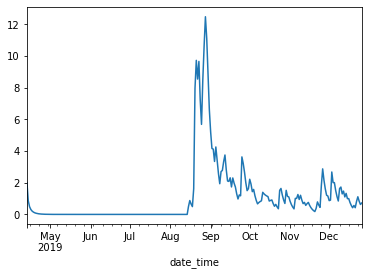

In [65]:
# exponential moving avg 
# looking for change in access from one program to another's curr
# 7 day EMA
ema_7d = activity_2019.ewm(span = 7).mean()
ema_7d.plot()

<AxesSubplot:xlabel='date_time'>

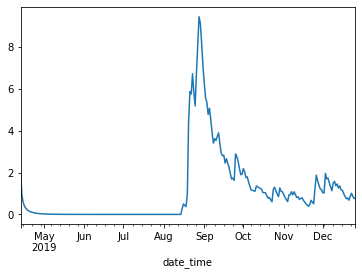

In [66]:
# 14 days EMA
ema_14d = activity_2019.ewm(span = 14).mean()
ema_14d.plot()

<AxesSubplot:xlabel='date_time'>

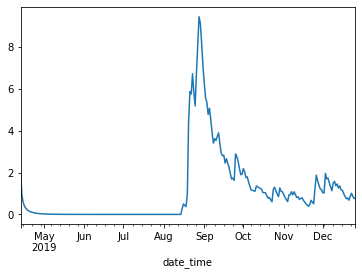

In [67]:
# 30 days EMA
ema_30d = activity_2019.ewm(span = 30).mean()
ema_14d.plot()

<AxesSubplot:xlabel='date_time'>

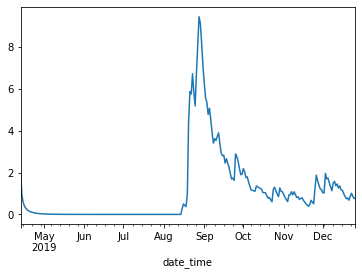

In [69]:
# 90 days EMA
ema_90d = activity_2019.ewm(span = 90).mean()
ema_14d.plot()

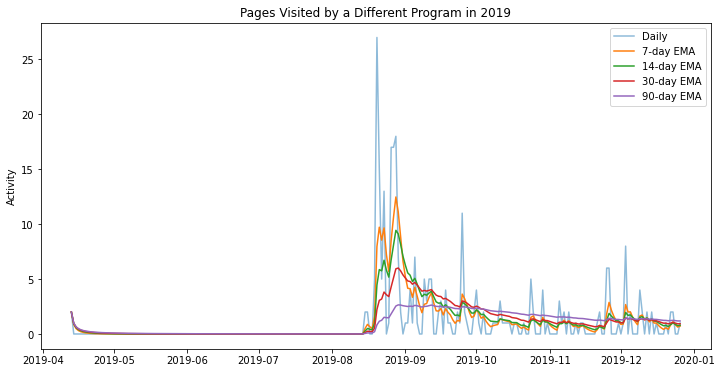

In [73]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(activity_2019.index, activity_2019, label='Daily', alpha=.5)

ax.plot(activity_2019.index, ema_7d, label = '7-day EMA')
ax.plot(activity_2019.index, ema_14d, label = '14-day EMA')
ax.plot(activity_2019.index, ema_30d, label = '30-day EMA')
ax.plot(activity_2019.index, ema_90d, label = '90-day EMA')

ax.legend(loc='best')
ax.set_ylabel('Activity')
plt.title('Pages Visited by a Different Program in 2019')

plt.show()

What studentd or staff were supposed to be able to view both? 

In [25]:
cross_over = pd.DataFrame(df_2019.groupby(by='user_id').cohort_id.nunique().sort_values(ascending=False))

In [38]:
df_2019.groupby(by='user_id').cohort_id.nunique().value_counts()

1    356
2      7
Name: cohort_id, dtype: int64

In [21]:
cross_over.value_counts()

1    356
2      7
Name: cohort_id, dtype: int64

In [26]:
cross_over.head()

,cohort_id
user_id,
314,2
346,2
53,2
539,2
428,2


In [31]:
cross_over.rename(columns={'cohort_id': 'number_of_cohorts'}, inplace=True)

In [32]:
cross_over.shape

(363, 1)

In [33]:
cross_over = cross_over[cross_over.number_of_cohorts>=2]

In [34]:
cross_over.shape

(7, 1)

In [39]:
cross_over.head

<bound method NDFrame.head of          number_of_cohorts
user_id                   
314                      2
346                      2
53                       2
539                      2
428                      2
40                       2
37                       2>

user 314 is web dev staff

In [44]:
# df_2019[(df_2019.user_id == 314)]

user 346 is in two web dev cohorts

In [45]:
# df_2019[(df_2019.user_id == 346)]

user 53 is web dev staff

In [49]:
# df_2019[(df_2019.user_id == 53)]

In [50]:
df_2019[(df_2019.user_id == 539)]

,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,date_time,program,staff,days_after_grad,year
date_time,,,,,,,,,,,,,,,,
2019-11-04 16:19:26,/,539,52.0,2,97.105.19.58,Europa,#europa,2019-11-04,2020-04-17,2019-11-04 18:27:07,2019-11-04 18:27:07,2019-11-04 16:19:26,web_dev,False,-165 days,2019
2019-11-04 16:19:34,toc,539,52.0,2,97.105.19.58,Europa,#europa,2019-11-04,2020-04-17,2019-11-04 18:27:07,2019-11-04 18:27:07,2019-11-04 16:19:34,web_dev,False,-165 days,2019
2019-11-04 16:54:02,html-css,539,52.0,2,97.105.19.58,Europa,#europa,2019-11-04,2020-04-17,2019-11-04 18:27:07,2019-11-04 18:27:07,2019-11-04 16:54:02,web_dev,False,-165 days,2019
2019-11-04 16:54:38,html-css/introduction,539,52.0,2,97.105.19.58,Europa,#europa,2019-11-04,2020-04-17,2019-11-04 18:27:07,2019-11-04 18:27:07,2019-11-04 16:54:38,web_dev,False,-165 days,2019
2019-11-04 16:54:45,html-css/elements,539,52.0,2,97.105.19.58,Europa,#europa,2019-11-04,2020-04-17,2019-11-04 18:27:07,2019-11-04 18:27:07,2019-11-04 16:54:45,web_dev,False,-165 days,2019
2019-11-05 11:04:37,spring,539,28.0,2,97.105.19.58,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2019-11-05 11:04:37,web_dev,True,2100 days,2019
2019-11-05 11:05:16,html-css,539,28.0,2,97.105.19.58,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2019-11-05 11:05:16,web_dev,True,2100 days,2019
2019-11-05 11:05:56,/,539,28.0,2,97.105.19.58,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2019-11-05 11:05:56,web_dev,True,2100 days,2019
2019-11-06 15:29:09,html-css/forms,539,28.0,2,97.105.19.58,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2019-11-06 15:29:09,web_dev,True,2101 days,2019


### 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [5]:
# distribution of logs by program
df.program.value_counts()

java            713365
data_science    103411
php              30548
front_end            5
Name: program, dtype: int64

Java, php, and front_end are all part of Web Development, so I will make a df for just web_dev alumni (after graduation and not a staff member).

In [38]:
# create a df of web_dev alumni active after graduation
web_dev_alumni = df[(df.days_after_grad > '0') & (df.path != '/') & (df.program == 'java') | (df.program == 'front_end') | (df.program == 'php') & (df.name != 'Staff')]

In [39]:
web_dev_alumni.head(1)

,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,date_time,program,staff,days_after_grad
date_time,,,,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,2018-01-26 09:55:03,php,False,720 days


In [40]:
# paths most accessed by java alumni
web_dev_alumni.path.value_counts().head()

javascript-i                4965
spring                      4261
search/search_index.json    3681
html-css                    3678
java-iii                    3537
Name: path, dtype: int64

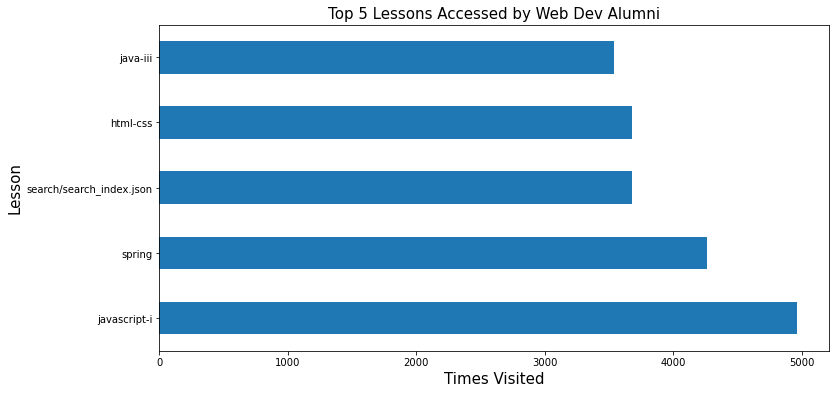

In [41]:
# Visualize paths most accessed by Web_Dev alumni
web_dev_alumni.path.value_counts().head().plot.barh(figsize=(12,6))
plt.title('Top 5 Lessons Accessed by Web Dev Alumni', fontsize=15)
plt.ylabel('Lesson', fontsize=15)
plt.xlabel('Times Visited', fontsize=15)
plt.show()

In [27]:
# create a df of data science alumni active after graduation
data_science_alumni = df[(df.days_after_grad > '0') & (df.program == 'data_science') & (df.name != 'Staff') & (df.path != '/')]

In [28]:
data_science_alumni.head(1)

,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,date_time,program,staff,days_after_grad
date_time,,,,,,,,,,,,,,,
2020-01-31 11:05:13,1-fundamentals/1.1-intro-to-data-science,476,34.0,3,136.50.49.145,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,2020-01-31 11:05:13,data_science,False,1 days


In [29]:
# paths most accessed by data science alumni
data_science_alumni.path.value_counts().head()

search/search_index.json                          493
sql/mysql-overview                                275
classification/overview                           266
classification/scale_features_or_not.svg          219
anomaly-detection/AnomalyDetectionCartoon.jpeg    193
Name: path, dtype: int64

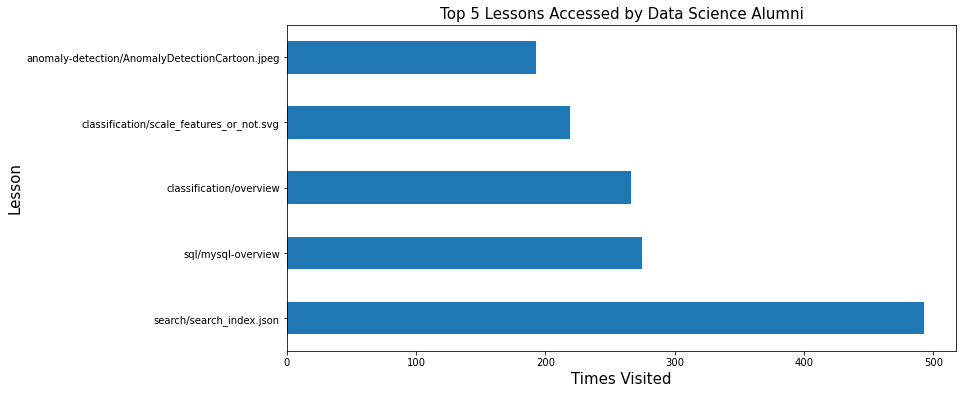

In [32]:
# Visualize paths most accessed by data science alumni
data_science_alumni.path.value_counts().head().plot.barh(figsize=(12,6))
plt.title('Top 5 Lessons Accessed by Data Science Alumni', fontsize=15)
plt.ylabel('Lesson', fontsize=15)
plt.xlabel('Times Visited', fontsize=15)
plt.show()